In [83]:
import numpy as np 
import pandas as pd 

In [84]:
# pip install networkx

In [85]:
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start]
    
    front_start = {start}
    front_goal = {goal}
    parent_start = {start: None}
    parent_goal = {goal: None}
    
    while front_start and front_goal:
        # Expand from start
        if front_start:
            next_front = set()
            for node in front_start:
                for neighbor in graph.neighbors(node):
                    if neighbor not in parent_start:
                        parent_start[neighbor] = node
                        next_front.add(neighbor)
                        if neighbor in parent_goal:
                            return reconstruct_path(neighbor, parent_start, parent_goal)
            front_start = next_front
            
        # Expand from goal
        if front_goal:
            next_front = set()
            for node in front_goal:
                for neighbor in graph.neighbors(node):
                    if neighbor not in parent_goal:
                        parent_goal[neighbor] = node
                        next_front.add(neighbor)
                        if neighbor in parent_start:
                            return reconstruct_path(neighbor, parent_start, parent_goal)
            front_goal = next_front
    
    return None

def reconstruct_path(meeting_node, parent_start, parent_goal):
    path_start = []
    node = meeting_node
    while node is not None:
        path_start.append(node)
        node = parent_start[node]
        
    path_goal = []
    node = meeting_node
    while node is not None:
        path_goal.append(node)
        node = parent_goal[node]
        
    return path_start[::-1] + path_goal[1:]


# Comparision

In [86]:
def bfs(graph, start, goal):
    visited = set()
    queue = deque([(start, [start])])
    
    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path
            
        visited.add(current)
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    return None

def dfs(graph, start, goal):
    visited = set()
    stack = [(start, [start])]
    
    while stack:
        current, path = stack.pop()
        if current == goal:
            return path
            
        visited.add(current)
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                stack.append((neighbor, path + [neighbor]))
    return None

# Creating My graph
G = nx.Graph()
G.add_edges_from([
    ("A", "B"), 
    ("A", "C"), 
    ("B", "D"), 
    ("B", "E"),
    ("C", "F"), 
    ("E", "F")
])

# Test all algorithms
start_node = "A"
goal_node = "D"

bidirectional_path = bidirectional_bfs(G, start_node, goal_node)

bfs_path = bfs(G, start_node, goal_node)
dfs_path = dfs(G, start_node, goal_node)

print(f"Bidirectional BFS Path: {bidirectional_path}")
print(f"BFS Path: {bfs_path}")
print(f"DFS Path: {dfs_path}")


Bidirectional BFS Path: ['A', 'B', 'D']
BFS Path: ['A', 'B', 'D']
DFS Path: ['A', 'C', 'F', 'E', 'B', 'D']


# Visualize 

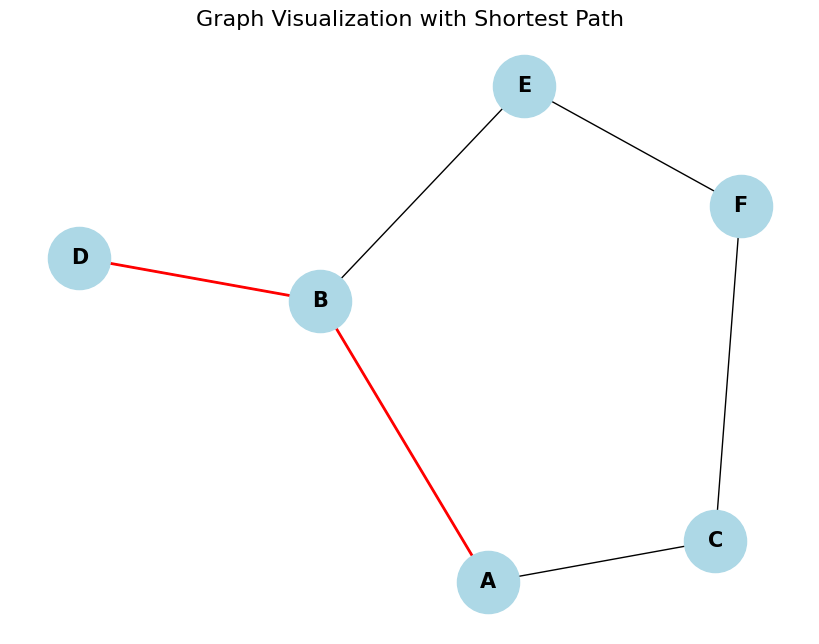

In [87]:
def visualize_path(G, path):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, 
            node_color='lightblue', 
            node_size=2000, 
            font_size=15, 
            font_weight='bold')
    
    # Highlighting the path
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, 
                             edgelist=path_edges, 
                             edge_color='red', 
                             width=2)
    
    plt.title("Graph Visualization with Shortest Path", fontsize=16)
    plt.show()
    
visualize_path(G, bidirectional_path)
